In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
# Step 1: Load the updated data
feedback_data = pd.read_csv('feedback.csv')
steps_data = pd.read_csv('steps.csv')

In [89]:
# Step 2: Data Exploration
print(feedback_data.head())
print(steps_data.head())
print(feedback_data.describe())
print(steps_data.describe())

   Steps Taken Outcome Feedback            Game Type
0           31    Goal       No  With Visual Signals
1           31    Goal      Yes  With Visual Signals
2           32    Goal      Yes  With Visual Signals
3           27    Goal      Yes  With Visual Signals
4           25    Goal      Yes  With Visual Signals
   Steps Taken Outcome               Game Type
0            5    Died  Without Visual Signals
1            2    Died  Without Visual Signals
2            4    Died  Without Visual Signals
3            6    Died  Without Visual Signals
4            1    Died  Without Visual Signals
       Steps Taken
count   252.000000
mean     25.349206
std       4.261039
min      18.000000
25%      22.000000
50%      26.000000
75%      29.000000
max      32.000000
       Steps Taken
count   252.000000
mean      4.261905
std       3.773843
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max      27.000000


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Encode categorical variables
feedback_data['Outcome_Encoded'] = feedback_data['Outcome'].map({'Goal': 1, 'Died': 0})
feedback_data['Feedback_Encoded'] = feedback_data['Feedback'].map({'Yes': 1, 'No': 0})

# Features and target variable
X = feedback_data[['Steps Taken', 'Feedback_Encoded']]
y = feedback_data['Outcome_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.07      0.12        14
           1       0.73      0.97      0.84        37

    accuracy                           0.73        51
   macro avg       0.62      0.52      0.48        51
weighted avg       0.67      0.73      0.64        51

[[ 1 13]
 [ 1 36]]


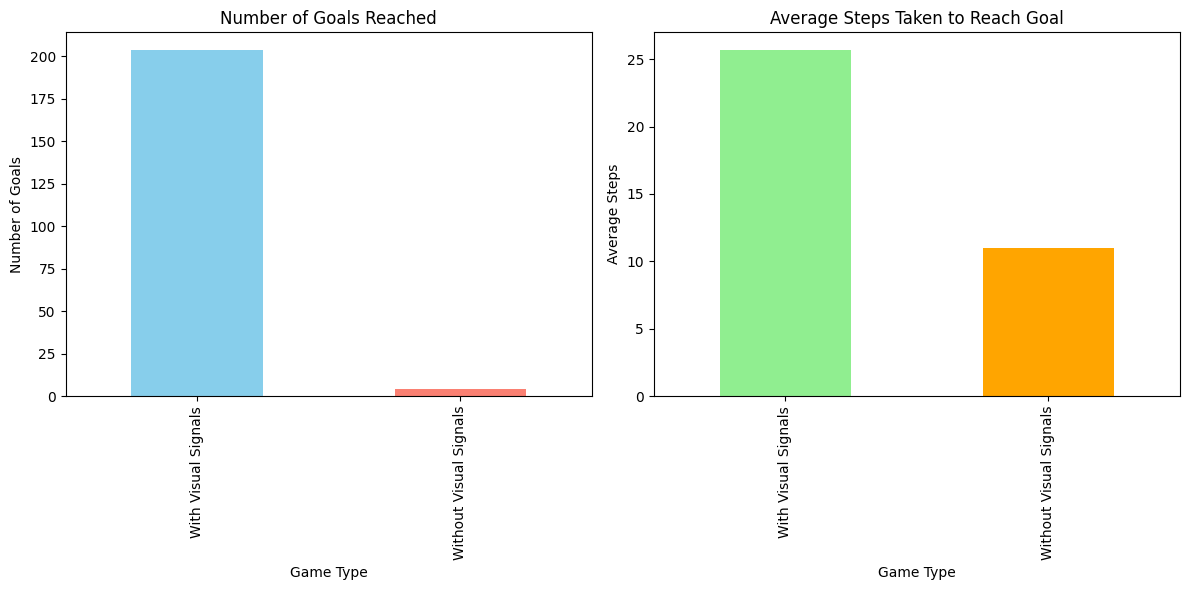

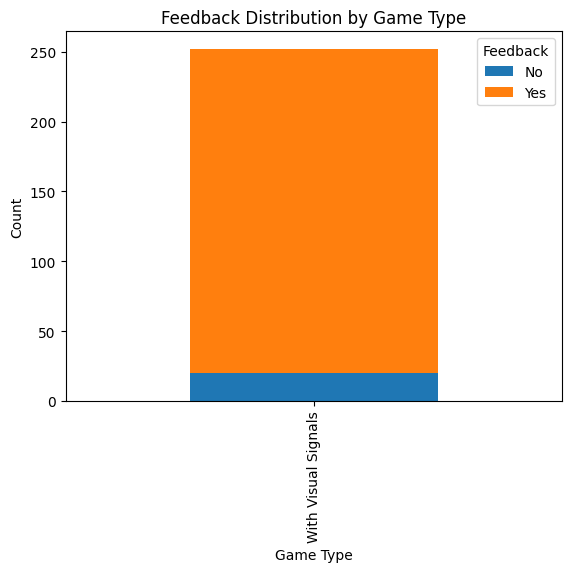

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the datasets
feedback_data = pd.read_csv('feedback.csv')
steps_data = pd.read_csv('steps.csv')

# Step 2: Add a column to indicate the presence of signals
feedback_data['Game Type'] = 'With Visual Signals'
steps_data['Game Type'] = 'Without Visual Signals'

# Step 3: Combine the datasets
combined_data = pd.concat([feedback_data, steps_data], ignore_index=True)

# Step 4: Calculate metrics
# Count the number of goals reached in each condition
goals_reached = combined_data[combined_data['Outcome'] == 'Goal'].groupby('Game Type').size()

# Calculate average steps taken to reach the goal for each condition
average_steps = combined_data[combined_data['Outcome'] == 'Goal'].groupby('Game Type')['Steps Taken'].mean()

# Calculate feedback distribution
feedback_distribution = combined_data.groupby(['Game Type', 'Feedback']).size().unstack(fill_value=0)

# Step 5: Visualize results
plt.figure(figsize=(12, 6))

# Bar plot for goals reached
plt.subplot(1, 2, 1)
goals_reached.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Goals Reached')
plt.xlabel('Game Type')
plt.ylabel('Number of Goals')

# Bar plot for average steps taken
plt.subplot(1, 2, 2)
average_steps.plot(kind='bar', color=['lightgreen', 'orange'])
plt.title('Average Steps Taken to Reach Goal')
plt.xlabel('Game Type')
plt.ylabel('Average Steps')

plt.tight_layout()
plt.show()

# Step 6: Visualize feedback distribution
feedback_distribution.plot(kind='bar', stacked=True)
plt.title('Feedback Distribution by Game Type')
plt.xlabel('Game Type')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.show()

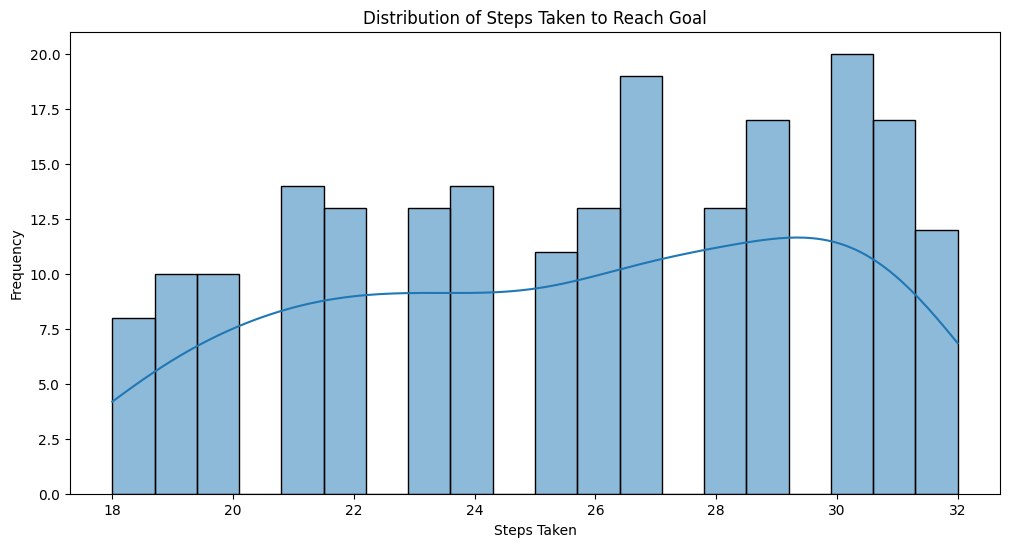

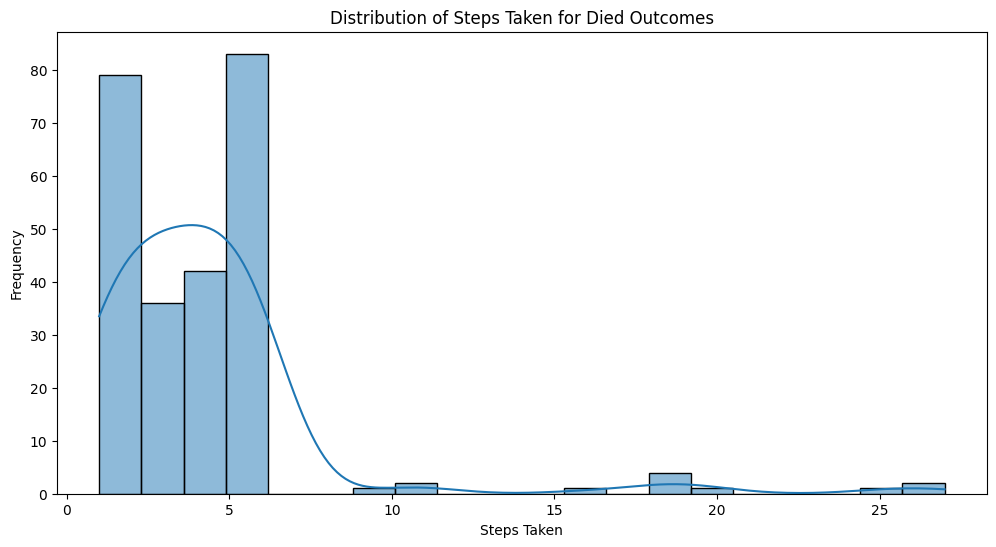

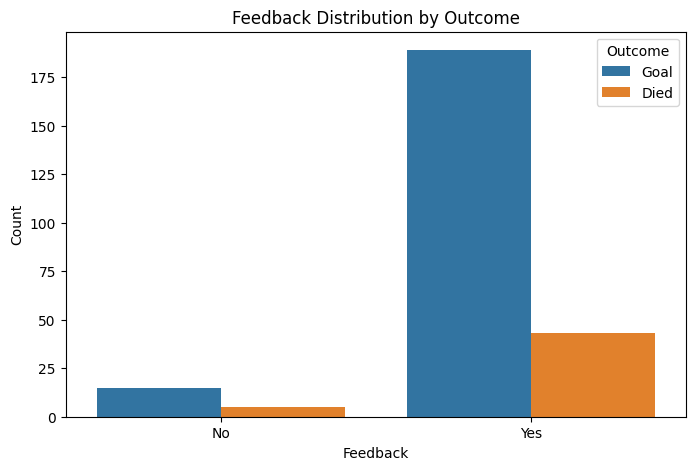

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of steps for Goals
plt.figure(figsize=(12, 6))
sns.histplot(feedback_data[feedback_data['Outcome'] == 'Goal']['Steps Taken'], bins=20, kde=True)
plt.title('Distribution of Steps Taken to Reach Goal')
plt.xlabel('Steps Taken')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of steps for Died outcomes
plt.figure(figsize=(12, 6))
sns.histplot(steps_data['Steps Taken'], bins=20, kde=True)
plt.title('Distribution of Steps Taken for Died Outcomes')
plt.xlabel('Steps Taken')
plt.ylabel('Frequency')
plt.show()

# Visualize feedback distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=feedback_data, x='Feedback', hue='Outcome')
plt.title('Feedback Distribution by Outcome')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()